In [1]:
# Setup dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#import dataframe
df_cleaned_edcovid=pd.read_csv ('../Outputs/cleaned_educational_covid_merged.csv')

df_cleaned_edcovid

,County,State,Alpha code,Population 18-24,Bachelors 18-24,Population Over 25,Bachelors Over 25,population,total cases,total deaths,...,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
0,Baldwin County,Alabama,AL,16407,1620,178759,59850,223234,70476,446,...,26.0,0.0,149596.0,119284.0,0.670,0.534,47583.0,0.213,19133.0,0.086
1,Calhoun County,Alabama,AL,12900,985,78478,16568,113605,41912,358,...,18.0,1.0,67165.0,55615.0,0.591,0.490,22007.0,0.194,7679.0,0.068
2,Cullman County,Alabama,AL,7022,112,63473,12787,83768,31702,150,...,7.0,1.0,38911.0,32943.0,0.465,0.393,13129.0,0.157,4396.0,0.052
3,DeKalb County,Alabama,AL,6580,429,48375,6597,71513,22651,104,...,3.0,1.0,30901.0,25210.0,0.432,0.353,9896.0,0.138,3166.0,0.044
4,Elmore County,Alabama,AL,6731,123,63862,14345,81209,30060,98,...,2.0,NaN,48321.0,39299.0,0.595,0.484,14703.0,0.181,5098.0,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Waukesha County,Wisconsin,WI,30602,5903,294850,143598,404198,141207,762,...,40.0,1.0,319939.0,294057.0,0.792,0.728,179816.0,0.445,91072.0,0.225
824,Winnebago County,Wisconsin,WI,19998,2150,116840,33586,171907,64589,137,...,13.0,0.0,118806.0,109922.0,0.691,0.639,69937.0,0.407,36461.0,0.212
825,Wood County,Wisconsin,WI,5143,480,52971,12796,72999,27518,47,...,25.0,0.0,51308.0,46843.0,0.703,0.642,28265.0,0.387,15692.0,0.215
826,Laramie County,Wyoming,WY,8508,759,69787,19803,99500,31964,44,...,6.0,0.0,67415.0,59013.0,0.678,0.593,26241.0,0.264,12525.0,0.126


In [3]:
#calculate totals
df_cleaned_edcovid['Total Adult Pop']=df_cleaned_edcovid['Population 18-24']+df_cleaned_edcovid['Population Over 25']
df_cleaned_edcovid['Total Adult Bach']=df_cleaned_edcovid['Bachelors 18-24']+df_cleaned_edcovid['Bachelors Over 25']
df_cleaned_edcovid.head()

,County,State,Alpha code,Population 18-24,Bachelors 18-24,Population Over 25,Bachelors Over 25,population,total cases,total deaths,...,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio,Total Adult Pop,Total Adult Bach
0,Baldwin County,Alabama,AL,16407,1620,178759,59850,223234,70476,446,...,149596.0,119284.0,0.670,0.534,47583.0,0.213,19133.0,0.086,195166,61470
1,Calhoun County,Alabama,AL,12900,985,78478,16568,113605,41912,358,...,67165.0,55615.0,0.591,0.490,22007.0,0.194,7679.0,0.068,91378,17553
2,Cullman County,Alabama,AL,7022,112,63473,12787,83768,31702,150,...,38911.0,32943.0,0.465,0.393,13129.0,0.157,4396.0,0.052,70495,12899
3,DeKalb County,Alabama,AL,6580,429,48375,6597,71513,22651,104,...,30901.0,25210.0,0.432,0.353,9896.0,0.138,3166.0,0.044,54955,7026
4,Elmore County,Alabama,AL,6731,123,63862,14345,81209,30060,98,...,48321.0,39299.0,0.595,0.484,14703.0,0.181,5098.0,0.063,70593,14468


In [4]:
#calculate percentages

df_cleaned_edcovid['Percent of Adults (all) with Bachelors']=df_cleaned_edcovid['Total Adult Bach']/df_cleaned_edcovid['Total Adult Pop']*100
df_cleaned_edcovid['Percent of Adults (25+) with Bachelors']=df_cleaned_edcovid['Bachelors Over 25']/df_cleaned_edcovid['Population Over 25']*100
df_cleaned_edcovid['Mortality Percentage']=df_cleaned_edcovid['total deaths']/df_cleaned_edcovid['population']*100
df_cleaned_edcovid['Infection Percentage']=df_cleaned_edcovid['total cases']/df_cleaned_edcovid['population']*100
df_cleaned_edcovid['Start Vacc Percentage']=df_cleaned_edcovid['vaccination initiated ratio']*100
df_cleaned_edcovid['Vaccinated Percentage']=df_cleaned_edcovid['vaccination completed ratio']*100
df_cleaned_edcovid['Multiple Vacc Percentage']=df_cleaned_edcovid['vaccination addl dose ratio']*100
df_cleaned_edcovid.head()

,County,State,Alpha code,Population 18-24,Bachelors 18-24,Population Over 25,Bachelors Over 25,population,total cases,total deaths,...,vaccination booster ratio,Total Adult Pop,Total Adult Bach,Percent of Adults (all) with Bachelors,Percent of Adults (25+) with Bachelors,Mortality Percentage,Infection Percentage,Start Vacc Percentage,Vaccinated Percentage,Multiple Vacc Percentage
0,Baldwin County,Alabama,AL,16407,1620,178759,59850,223234,70476,446,...,0.086,195166,61470,31.496265,33.480832,0.199790,31.570460,67.0,53.4,21.3
1,Calhoun County,Alabama,AL,12900,985,78478,16568,113605,41912,358,...,0.068,91378,17553,19.209219,21.111649,0.315127,36.892742,59.1,49.0,19.4
2,Cullman County,Alabama,AL,7022,112,63473,12787,83768,31702,150,...,0.052,70495,12899,18.297752,20.145574,0.179066,37.845000,46.5,39.3,15.7
3,DeKalb County,Alabama,AL,6580,429,48375,6597,71513,22651,104,...,0.044,54955,7026,12.785006,13.637209,0.145428,31.673961,43.2,35.3,13.8
4,Elmore County,Alabama,AL,6731,123,63862,14345,81209,30060,98,...,0.063,70593,14468,20.494950,22.462497,0.120676,37.015602,59.5,48.4,18.1


In [5]:
print(df_cleaned_edcovid.columns)

Index(['County', 'State', 'Alpha code', 'Population 18-24', 'Bachelors 18-24',
       'Population Over 25', 'Bachelors Over 25', 'population', 'total cases',
       'total deaths', 'hospital beds', 'hospital beds usage',
       'hospital beds covid', 'hospital icu beds', 'hospital icu beds usage',
       'hospital icu beds covid', 'vaccination initiated',
       'vaccination completed', 'vaccination initiated ratio',
       'vaccination completed ratio', 'vaccination addl dose',
       'vaccination addl dose ratio', 'vaccination booster',
       'vaccination booster ratio', 'Total Adult Pop', 'Total Adult Bach',
       'Percent of Adults (all) with Bachelors',
       'Percent of Adults (25+) with Bachelors', 'Mortality Percentage',
       'Infection Percentage', 'Start Vacc Percentage',
       'Vaccinated Percentage', 'Multiple Vacc Percentage'],
      dtype='object')


In [6]:
#reduce to relevant columns
hospital_df = df_cleaned_edcovid[['hospital beds', 'hospital beds usage',
       'Vaccinated Percentage']]
hospital_df

,hospital beds,hospital beds usage,Vaccinated Percentage
0,375.0,288.0,53.4
1,221.0,193.0,49.0
2,164.0,117.0,39.3
3,58.0,29.0,35.3
4,73.0,17.0,48.4
...,...,...,...
823,642.0,386.0,72.8
824,296.0,181.0,63.9
825,263.0,223.0,64.2
826,182.0,140.0,59.3


In [7]:
hospital_df.dropna(subset=['hospital beds'], inplace=True)
hospital_df.dropna(subset=['hospital beds usage'], inplace=True)
hospital_df.dropna(subset=['Vaccinated Percentage'], inplace=True)
hospital_df.count()

C:\Users\dkrenn\AppData\Local\Temp\1\ipykernel_10264\2313131412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_df.dropna(subset=['hospital beds'], inplace=True)
C:\Users\dkrenn\AppData\Local\Temp\1\ipykernel_10264\2313131412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_df.dropna(subset=['hospital beds usage'], inplace=True)
C:\Users\dkrenn\AppData\Local\Temp\1\ipykernel_10264\2313131412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

hospital beds            797
hospital beds usage      797
Vaccinated Percentage    797
dtype: int64

In [8]:
hospital_df['Bed Percentage']= hospital_df['hospital beds usage']/hospital_df['hospital beds']*100
hospital_df.head()

C:\Users\dkrenn\AppData\Local\Temp\1\ipykernel_10264\3504039936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_df['Bed Percentage']= hospital_df['hospital beds usage']/hospital_df['hospital beds']*100


,hospital beds,hospital beds usage,Vaccinated Percentage,Bed Percentage
0,375.0,288.0,53.4,76.800000
1,221.0,193.0,49.0,87.330317
2,164.0,117.0,39.3,71.341463
3,58.0,29.0,35.3,50.000000
4,73.0,17.0,48.4,23.287671


r value: 0.0
p value: 0.99
regression equation: y=0.0*x+79.22


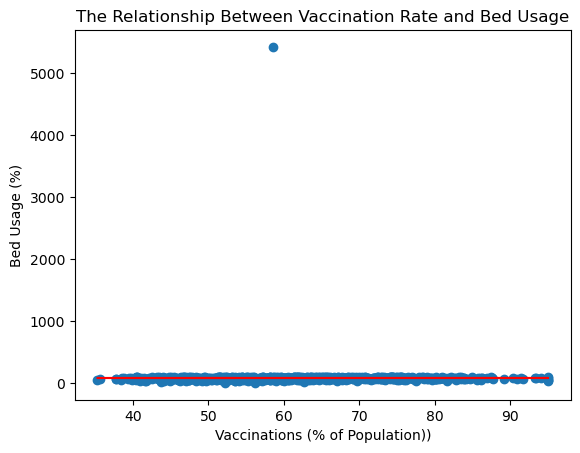

In [9]:
slope, intc, r, p, std_err = linregress(hospital_df['Vaccinated Percentage'], hospital_df['Bed Percentage'])
model=slope*hospital_df['Vaccinated Percentage']+intc
plt.scatter(hospital_df['Vaccinated Percentage'], hospital_df["Bed Percentage"])
plt.plot(hospital_df['Vaccinated Percentage'], model, color='red')
plt.title('The Relationship Between Vaccination Rate and Bed Usage')
plt.ylabel('Bed Usage (%)')
plt.xlabel('Vaccinations (% of Population))')
plt.savefig("../Outputs/Bed Usage.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

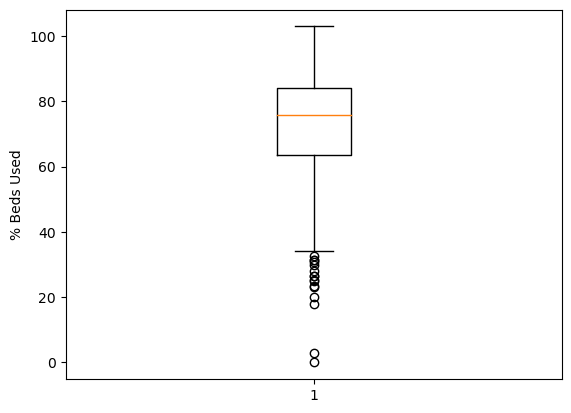

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Beds Used')
ax1.boxplot(hospital_df['Bed Percentage'])
plt.show()

In [37]:
#remove outlier
hospital_df = hospital_df.loc[hospital_df['Bed Percentage']<100.0001]
hospital_df

,hospital beds,hospital beds usage,Vaccinated Percentage,Bed Percentage
827,125.0,125.0,47.8,100.000000
441,85.0,85.0,66.7,100.000000
778,75.0,75.0,61.4,100.000000
240,147.0,147.0,52.5,100.000000
388,100.0,100.0,56.0,100.000000
...,...,...,...,...
682,13.0,3.0,60.0,23.076923
527,10.0,2.0,62.7,20.000000
712,28.0,5.0,43.7,17.857143
55,106.0,3.0,56.2,2.830189


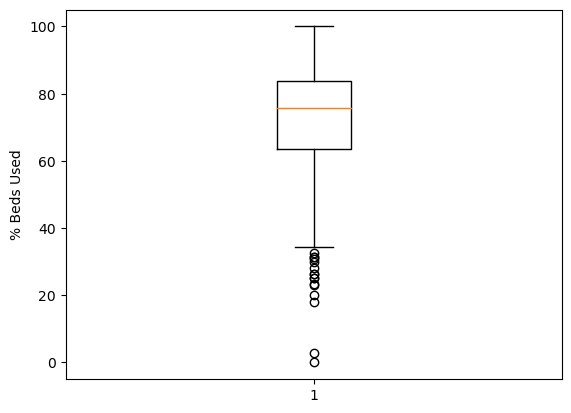

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Beds Used')
ax1.boxplot(hospital_df['Bed Percentage'])
plt.show()

In [39]:
#find outlier
hospital_df = hospital_df.sort_values(['Bed Percentage'], ascending=True)
hospital_df.head()          

,hospital beds,hospital beds usage,Vaccinated Percentage,Bed Percentage
273,25.0,0.0,52.2,0.000000
55,106.0,3.0,56.2,2.830189
712,28.0,5.0,43.7,17.857143
527,10.0,2.0,62.7,20.000000
682,13.0,3.0,60.0,23.076923


In [40]:
hospital_df = hospital_df.loc[hospital_df['Bed Percentage']>10]
hospital_df

,hospital beds,hospital beds usage,Vaccinated Percentage,Bed Percentage
712,28.0,5.0,43.7,17.857143
527,10.0,2.0,62.7,20.000000
682,13.0,3.0,60.0,23.076923
4,73.0,17.0,48.4,23.287671
242,12.0,3.0,69.7,25.000000
...,...,...,...,...
388,100.0,100.0,56.0,100.000000
240,147.0,147.0,52.5,100.000000
778,75.0,75.0,61.4,100.000000
441,85.0,85.0,66.7,100.000000


r value: 0.13
p value: 0.0
regression equation: y=0.17*x+62.11


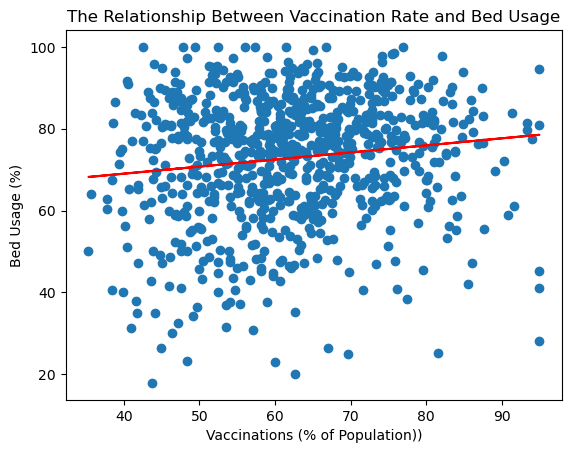

In [41]:
#regression: Vaccination Rate-->Bed Usage Rate
slope, intc, r, p, std_err = linregress(hospital_df['Vaccinated Percentage'], hospital_df['Bed Percentage'])
model=slope*hospital_df['Vaccinated Percentage']+intc
plt.scatter(hospital_df['Vaccinated Percentage'], hospital_df["Bed Percentage"])
plt.plot(hospital_df['Vaccinated Percentage'], model, color='red')
plt.title('The Relationship Between Vaccination Rate and Bed Usage')
plt.ylabel('Bed Usage (%)')
plt.xlabel('Vaccinations (% of Population))')
plt.savefig("../Outputs/Bed Usage.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))